In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
teams_df = pd.read_csv("Teams.csv")
playoffs_df = pd.read_csv("PlayoffTeams.csv")
salaries_df = pd.read_csv("Salaries.csv")
franchises_df = pd.read_csv("TeamsFranchises.csv")
master_df = pd.read_csv("Master.csv")

teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [3]:
# clean up Teams dataframes to chosen years (2005-2015)

teams_df = teams_df.loc[teams_df['yearID'] > 2004]
teams_df.count
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2004]
playoffs_df.count
salaries_df = salaries_df.loc[salaries_df['yearID'] > 2004]

In [4]:
winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
winners_df.head()
winners_df.count()
#losers_df
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()
losers_df.head()
losers_df.count()

print(winners_df)
print(losers_df)

    teamIDwinner
222          CHA
224          LAA
225          HOU
226          SLN
229          DET
231          OAK
233          NYN
236          BOS
238          CLE
239          COL
240          ARI
243          TBA
246          PHI
247          LAN
250          NYA
257          TEX
260          SFN
269          MIL
271          BAL
284          PIT
289          KCA
301          TOR
302          CHN
    teamIDloser
222         LAA
223         BOS
224         NYA
225         SLN
226         SDN
227         ATL
228         HOU
229         OAK
231         MIN
232         NYN
233         LAN
235         DET
236         CLE
239         ARI
240         CHN
241         PHI
242         COL
245         CHA
248         MIL
249         TBA
261         CIN
263         TEX
273         BAL
277         WAS
286         PIT
297         KCA
299         TOR


<span style="color:red">**<<<<<<< local**</span>

In [5]:
# creating list of unique teams in playoffs

playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()

playoff_count_df


SLN    18
NYA    12
DET    11
PHI    10
BOS    10
SFN    10
LAN     9
TEX     8
LAA     7
KCA     7
TBA     7
HOU     5
CHN     5
OAK     5
NYN     5
COL     4
BAL     4
CHA     4
PIT     4
ATL     4
CIN     3
ARI     3
CLE     3
MIN     3
MIL     3
WAS     2
TOR     2
SDN     2
dtype: int64

28

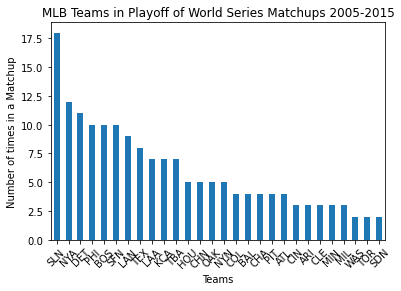

In [73]:
# Ended up not using this in presentation, just for peliminary work up.

playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])

playoff_count_df = playoff_count_df.value_counts()

playoff_chart = playoff_count_df.plot.bar(rot=45)
plt.title("MLB Teams in Playoff of World Series Matchups 2005-2015")
plt.xlabel("Teams")
plt.ylabel("Number of times in a Matchup")
playoff_chart
playoff_count_df.count()

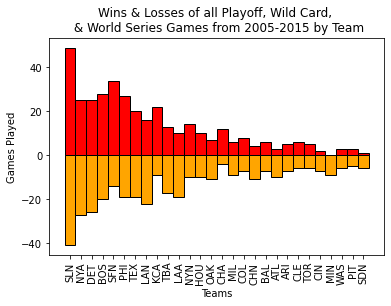

,W-Win,W-Loss,L-Win,L-Loss,Total Wins,Total Losses,Total Games
Teams,,,,,,,
SLN,39.0,19.0,10.0,22.0,49.0,41.0,90.0
NYA,17.0,6.0,8.0,21.0,25.0,27.0,52.0
DET,20.0,7.0,5.0,19.0,25.0,26.0,51.0
BOS,25.0,10.0,3.0,10.0,28.0,20.0,48.0
SFN,34.0,14.0,0.0,0.0,34.0,14.0,48.0
PHI,21.0,5.0,6.0,14.0,27.0,19.0,46.0
TEX,14.0,7.0,6.0,12.0,20.0,19.0,39.0
LAN,9.0,1.0,7.0,21.0,16.0,22.0,38.0
KCA,19.0,5.0,3.0,4.0,22.0,9.0,31.0


In [72]:
# stacked bar graph for wins and loses per match up AND ratio of wins to total games played per year per team

wins_losses_df = playoffs_df.copy()

# Seperating out data by team for wins and losses

wins = wins_losses_df[["teamIDwinner", "wins",
                       "losses"]].rename(columns={"teamIDwinner":"Teams", "wins": "W-Win", "losses":"W-Loss"})

losses = wins_losses_df[["teamIDloser", "losses",
                         "wins"]].rename(columns={"teamIDloser":"Teams", "losses":"L-Win", "wins":"L-Loss"})

win_data = wins.groupby(["Teams"]).sum()

loss_data = losses.groupby(["Teams"]).sum()

games_df = pd.merge(win_data, loss_data, on="Teams", how="outer")

games_df = games_df.fillna(0)

games_df["Total Wins"] = games_df["W-Win"] + games_df["L-Win"]

games_df["Total Losses"] = games_df["W-Loss"] + games_df["L-Loss"]

games_df["Total Games"] = games_df["Total Wins"] + games_df["Total Losses"]

games_df.sort_values(by=["Total Games"], inplace=True, ascending=False)

# Bar chart

win_bar = games_df["Total Wins"]
# loss_bar = games_df["Total Losses"]
loss_bar = games_df["Total Losses"]*(-1)

bars = np.add(win_bar, loss_bar).tolist()

r = np.arange(0,56,2)

names = games_df.index.values
width = 2

# plt.bar(r, win_bar, bottom=loss_bar, color='red', edgecolor='black', width=barWidth)
plt.bar(r, win_bar, color='red', edgecolor='black', width=width)
plt.bar(r, loss_bar, color='orange', edgecolor='black', width=width)

plt.xticks(r, names, rotation=90)
plt.xlabel("Teams")
plt.ylabel("Games Played")
plt.title("Wins & Losses of all Playoff, Wild Card, \n & World Series Games from 2005-2015 by Team")
plt.show()

# This is just a check. It provides the totals of all games per team. Since every match has a winner and a loser,
# the "Total Games" will be double the number of matches in the playoffs and WS between 2005-2015.
# games_df.sum()

games_df

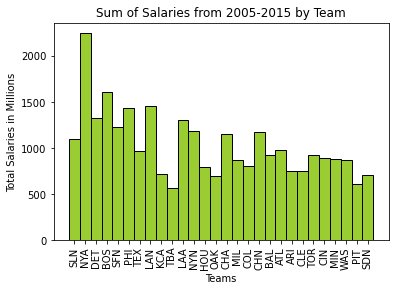

In [71]:
# Sum of salaries by year and team

#teams_salary_sum = playoff_count_df.rename(columns={"teamIDwinner":"Teams", "wins": "W-Win", "losses":"W-Loss"})
teams_games = games_df.reset_index()
teams_games = teams_games[["Teams", "Total Games"]].rename(columns={"Teams":"teamID"})

salaries_total = salaries_df.groupby(["teamID"]).sum()

salary_sum = pd.merge(teams_games, salaries_total, on="teamID", how="left")
salary_sum["Total Player Salary (Millions)"]  = salary_sum["salary"]/1000000

money_bar = salary_sum["Total Player Salary (Millions)"]

r = np.arange(0,56,2)

width = 2

plt.bar(r, money_bar, color='yellowgreen', edgecolor='black', width=width)

plt.xticks(r, salary_sum["teamID"], rotation=90)
plt.xlabel("Teams")
plt.ylabel("Total Salaries in Millions")
plt.title("Sum of Salaries from 2005-2015 by Team")
plt.show()

In [70]:
# ratio of wins to total games played per year per team, did not include in presentation
# This did help me get started for the spaghetti chart though

wins_year = wins_losses_df[["teamIDwinner", "wins", "losses", 
                       "yearID"]].rename(columns={"teamIDwinner":"Teams", "wins": "Wins", "losses":"Losses"})

wins_year = wins_year.groupby(["Teams", "yearID"]).sum()

wins_year = wins_year.reset_index()

losses_year = wins_losses_df[["teamIDloser", "losses",
                              "wins", "yearID"]].rename(columns={"teamIDloser":"Teams", "losses":"Wins", "wins":"Losses"})

losses_year = losses_year.groupby(["Teams", "yearID"]).sum()

losses_year = losses_year.reset_index()

ratio_df = wins_year.append(losses_year)

ratio_df = ratio_df.groupby(["yearID", "Teams"]).sum()

ratio_df["Total Games"] = ratio_df["Wins"] + ratio_df["Losses"]

ratio_df["Ratio of Wins"] = ratio_df["Wins"] / ratio_df["Total Games"]

ratio_df = ratio_df.reset_index()

df_years = ratio_df["yearID"].drop_duplicates()

ratio_df

,yearID,Teams,Wins,Losses,Total Games,Ratio of Wins
0,2005,ATL,1,3,4,0.250000
1,2005,BOS,0,3,3,0.000000
2,2005,CHA,11,1,12,0.916667
3,2005,HOU,7,7,14,0.500000
4,2005,LAA,4,6,10,0.400000
...,...,...,...,...,...,...
91,2015,NYN,8,6,14,0.571429
92,2015,PIT,0,1,1,0.000000
93,2015,SLN,1,3,4,0.250000
94,2015,TEX,2,3,5,0.400000


In [64]:
# Making the spaghetti chart of total games by team broken down by year

ratio_years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

filter_SLN = ratio_df["Teams"].isin(["SLN"])
SLN_ratio = ratio_df[filter_SLN]
SLN_games = pd.merge(df_years, SLN_ratio, on="yearID", how="outer")
SLN_games = SLN_games.fillna(0)

filter_NYA = ratio_df["Teams"].isin(["NYA"])
NYA_ratio = ratio_df[filter_NYA]
NYA_games = pd.merge(df_years, NYA_ratio, on="yearID", how="outer")
NYA_games = NYA_games.fillna(0)

filter_DET = ratio_df["Teams"].isin(["DET"])
DET_ratio = ratio_df[filter_DET]
DET_games = pd.merge(df_years, DET_ratio, on="yearID", how="outer")
DET_games = DET_games.fillna(0)

filter_BOS = ratio_df["Teams"].isin(["BOS"])
BOS_ratio = ratio_df[filter_BOS]
BOS_games = pd.merge(df_years, BOS_ratio, on="yearID", how="outer")
BOS_games = BOS_games.fillna(0)

filter_PHI = ratio_df["Teams"].isin(["PHI"])
PHI_ratio = ratio_df[filter_PHI]
PHI_games = pd.merge(df_years, PHI_ratio, on="yearID", how="outer")
PHI_games = PHI_games.fillna(0)

filter_SFN = ratio_df["Teams"].isin(["SFN"])
SFN_ratio = ratio_df[filter_SFN]
SFN_games = pd.merge(df_years, SFN_ratio, on="yearID", how="outer")
SFN_games = SFN_games.fillna(0)

filter_LAN = ratio_df["Teams"].isin(["LAN"])
LAN_ratio = ratio_df[filter_LAN]
LAN_games = pd.merge(df_years, LAN_ratio, on="yearID", how="outer")
LAN_games = LAN_games.fillna(0)

filter_TEX = ratio_df["Teams"].isin(["TEX"])
TEX_ratio = ratio_df[filter_TEX]
TEX_games = pd.merge(df_years, TEX_ratio, on="yearID", how="outer")
TEX_games = TEX_games.fillna(0)

filter_LAA = ratio_df["Teams"].isin(["LAA"])
LAA_ratio = ratio_df[filter_LAA]
LAA_games = pd.merge(df_years, LAA_ratio, on="yearID", how="outer")
LAA_games = LAA_games.fillna(0)

filter_TBA = ratio_df["Teams"].isin(["TBA"])
TBA_ratio = ratio_df[filter_TBA]
TBA_games = pd.merge(df_years, TBA_ratio, on="yearID", how="outer")
TBA_games = TBA_games.fillna(0)

filter_KCA = ratio_df["Teams"].isin(["KCA"])
KCA_ratio = ratio_df[filter_KCA]
KCA_games = pd.merge(df_years, KCA_ratio, on="yearID", how="outer")
KCA_games = KCA_games.fillna(0)

filter_HOU = ratio_df["Teams"].isin(["HOU"])
HOU_ratio = ratio_df[filter_HOU]
HOU_games = pd.merge(df_years, HOU_ratio, on="yearID", how="outer")
HOU_games = HOU_games.fillna(0)

filter_CHN = ratio_df["Teams"].isin(["CHN"])
CHN_ratio = ratio_df[filter_CHN]
CHN_games = pd.merge(df_years, CHN_ratio, on="yearID", how="outer")
CHN_games = CHN_games.fillna(0)

filter_NYN = ratio_df["Teams"].isin(["NYN"])
NYN_ratio = ratio_df[filter_NYN]
NYN_games = pd.merge(df_years, NYN_ratio, on="yearID", how="outer")
NYN_games = NYN_games.fillna(0)

filter_OAK = ratio_df["Teams"].isin(["OAK"])
OAK_ratio = ratio_df[filter_OAK]
OAK_games = pd.merge(df_years, OAK_ratio, on="yearID", how="outer")
OAK_games = OAK_games.fillna(0)

filter_ATL = ratio_df["Teams"].isin(["ATL"])
ATL_ratio = ratio_df[filter_ATL]
ATL_games = pd.merge(df_years, ATL_ratio, on="yearID", how="outer")
ATL_games = ATL_games.fillna(0)

filter_COL = ratio_df["Teams"].isin(["COL"])
COL_ratio = ratio_df[filter_COL]
COL_games = pd.merge(df_years, COL_ratio, on="yearID", how="outer")
COL_games = COL_games.fillna(0)

filter_BAL = ratio_df["Teams"].isin(["BAL"])
BAL_ratio = ratio_df[filter_BAL]
BAL_games = pd.merge(df_years, BAL_ratio, on="yearID", how="outer")
BAL_games = BAL_games.fillna(0)

filter_CHA = ratio_df["Teams"].isin(["CHA"])
CHA_ratio = ratio_df[filter_CHA]
CHA_games = pd.merge(df_years, CHA_ratio, on="yearID", how="outer")
CHA_games = CHA_games.fillna(0)

filter_PIT = ratio_df["Teams"].isin(["PIT"])
PIT_ratio = ratio_df[filter_PIT]
PIT_games = pd.merge(df_years, PIT_ratio, on="yearID", how="outer")
PIT_games = PIT_games.fillna(0)

filter_CLE = ratio_df["Teams"].isin(["CLE"])
CLE_ratio = ratio_df[filter_CLE]
CLE_games = pd.merge(df_years, CLE_ratio, on="yearID", how="outer")
CLE_games = CLE_games.fillna(0)

filter_ARI = ratio_df["Teams"].isin(["ARI"])
ARI_ratio = ratio_df[filter_ARI]
ARI_games = pd.merge(df_years, ARI_ratio, on="yearID", how="outer")
ARI_games = ARI_games.fillna(0)

filter_MIN = ratio_df["Teams"].isin(["MIN"])
MIN_ratio = ratio_df[filter_MIN]
MIN_games = pd.merge(df_years, MIN_ratio, on="yearID", how="outer")
MIN_games = MIN_games.fillna(0)

filter_MIL = ratio_df["Teams"].isin(["MIL"])
MIL_ratio = ratio_df[filter_MIL]
MIL_games = pd.merge(df_years, MIL_ratio, on="yearID", how="outer")
MIL_games = MIL_games.fillna(0)

filter_CIN = ratio_df["Teams"].isin(["CIN"])
CIN_ratio = ratio_df[filter_CIN]
CIN_games = pd.merge(df_years, CIN_ratio, on="yearID", how="outer")
CIN_games = CIN_games.fillna(0)

filter_WAS = ratio_df["Teams"].isin(["WAS"])
WAS_ratio = ratio_df[filter_WAS]
WAS_games = pd.merge(df_years, WAS_ratio, on="yearID", how="outer")
WAS_games = WAS_games.fillna(0)

filter_TOR = ratio_df["Teams"].isin(["TOR"])
TOR_ratio = ratio_df[filter_TOR]
TOR_games = pd.merge(df_years, TOR_ratio, on="yearID", how="outer")
TOR_games = TOR_games.fillna(0)

filter_SDN = ratio_df["Teams"].isin(["SDN"])
SDN_ratio = ratio_df[filter_SDN]
SDN_games = pd.merge(df_years, SDN_ratio, on="yearID", how="outer")
SDN_games = SDN_games.fillna(0)

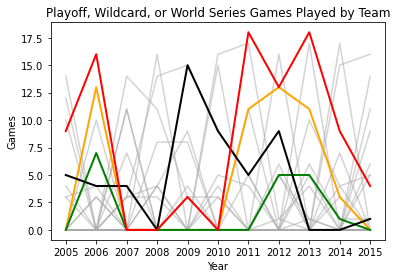

In [65]:
# The actual spaghetti chart

BOS = plt.plot(ratio_years, BOS_games["Total Games"], color="darkgray", label="4", alpha=0.5)
PHI = plt.plot(ratio_years, PHI_games["Total Games"], color="darkgray", label="5", alpha=0.5)
SFN = plt.plot(ratio_years, SFN_games["Total Games"], color="darkgray", label="6", alpha=0.5)
LAN = plt.plot(ratio_years, LAN_games["Total Games"], color="darkgray", label="7", alpha=0.5)
TEX = plt.plot(ratio_years, TEX_games["Total Games"], color="darkgray", label="8", alpha=0.5)
LAA = plt.plot(ratio_years, LAA_games["Total Games"], color="darkgray", label="9", alpha=0.5)
TBA = plt.plot(ratio_years, TBA_games["Total Games"], color="darkgray", label="10", alpha=0.5)
KCA = plt.plot(ratio_years, KCA_games["Total Games"], color="darkgray", label="11", alpha=0.5)
HOU = plt.plot(ratio_years, HOU_games["Total Games"], color="darkgray", label="12", alpha=0.5)
CHN = plt.plot(ratio_years, CHN_games["Total Games"], color="darkgray", label="13", alpha=0.5)
NYN = plt.plot(ratio_years, NYN_games["Total Games"], color="darkgray", label="14", alpha=0.5)
ATL = plt.plot(ratio_years, ATL_games["Total Games"], color="darkgray", label="16", alpha=0.5)
COL = plt.plot(ratio_years, COL_games["Total Games"], color="darkgray", label="17", alpha=0.5)
BAL = plt.plot(ratio_years, BAL_games["Total Games"], color="darkgray", label="18", alpha=0.5)
CHA = plt.plot(ratio_years, CHA_games["Total Games"], color="darkgray", label="19", alpha=0.5)
PIT = plt.plot(ratio_years, PIT_games["Total Games"], color="darkgray", label="20", alpha=0.5)
CLE = plt.plot(ratio_years, CLE_games["Total Games"], color="darkgray", label="21", alpha=0.5)
ARI = plt.plot(ratio_years, ARI_games["Total Games"], color="darkgray", label="22", alpha=0.5)
MIN = plt.plot(ratio_years, MIN_games["Total Games"], color="darkgray", label="23", alpha=0.5)
MIL = plt.plot(ratio_years, MIL_games["Total Games"], color="darkgray", label="24", alpha=0.5)
CIN = plt.plot(ratio_years, CIN_games["Total Games"], color="darkgray", label="25", alpha=0.5)
WAS = plt.plot(ratio_years, WAS_games["Total Games"], color="darkgray", label="26", alpha=0.5)
TOR = plt.plot(ratio_years, TOR_games["Total Games"], color="darkgray", label="27", alpha=0.5)
SDN = plt.plot(ratio_years, SDN_games["Total Games"], color="darkgray", label="28", alpha=0.5)

DET = plt.plot(ratio_years, DET_games["Total Games"], color="orange", label="3", linewidth=2)
OAK = plt.plot(ratio_years, OAK_games["Total Games"], color="green", label="15", linewidth=2)
NYA = plt.plot(ratio_years, NYA_games["Total Games"], color="black", label="2", linewidth=2)
SLN = plt.plot(ratio_years, SLN_games["Total Games"], color="red", label="1", linewidth=2)

plt.title("Playoff, Wildcard, or World Series Games Played by Team")
plt.xlabel("Year")
plt.ylabel("Games")

plt.show()

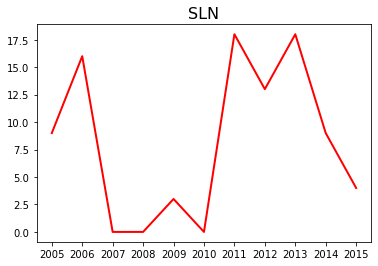

In [69]:
# Individual chart that is easier to read and use for teams we're singling out for deep dive

SLN = plt.plot(ratio_years, SLN_games["Total Games"], color="red", label="1", linewidth=2)
plt.title("SLN", fontsize=16)


plt.show()

<span style="color:red">**>>>>>>> remote**</span>

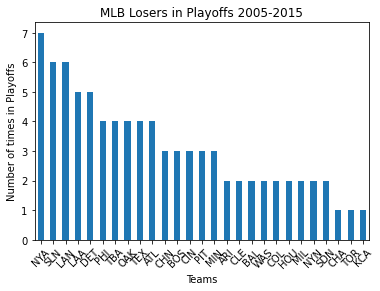

In [67]:
# Ended up not using this in presentation, just for peliminary work up.

loser_teams = playoffs_df['teamIDloser'].value_counts()

playoffs_loses = loser_teams.plot.bar(rot=45)
plt.title("MLB Losers in Playoffs 2005-2015")
plt.xlabel("Teams")
plt.ylabel("Number of times in Playoffs")
playoffs_loses

In [68]:
#MONEY SECTION
#How much is a team that got to the playoffs between 2005-2015 spending #per year
# #What is the average per team per general player per    
# Create 2 dataframes answering 2 objectives:
# salaries_describe['Sum'] - How much is a play offs team spends total per year 
# salaries_describe['mean'] - How much the playoff team spends per general player per year
# top_ten_sum; top_ten_mean - Find the teams that spend Too Much - top 10% (?) 
# Make Bar graph for 1 and 2

salaries_test_df = salaries_df.loc[salaries_df['teamID'].isin(playoff_count_df.index)]

salaries_test_df = salaries_test_df.groupby(['yearID', 'teamID'])
salaries_describe = salaries_test_df.describe()
salaries_describe['salary','Sum'] = salaries_test_df.sum()

quantile_09 = salaries_describe.quantile(.9)

top_ten_mean = salaries_describe.loc[salaries_describe['salary','mean']>quantile_09['salary']['mean']]
top_ten_sum = salaries_describe.loc[salaries_describe['salary','Sum']>quantile_09['salary']['Sum']]



In [17]:
top_ten_mean

salary                                                    \
               count          mean           std       min         25%   
yearID teamID                                                            
2005   NYA      26.0  8.011801e+06  7.117015e+06  317200.0  2187500.00   
2006   NYA      28.0  6.952253e+06  7.343890e+06  328600.0   912500.00   
2007   NYA      28.0  6.759252e+06  7.725153e+06  382048.0   450042.25   
2008   NYA      30.0  6.929893e+06  8.164959e+06  390000.0   400312.50   
2009   CHN      25.0  5.392360e+06  6.194445e+06  400000.0   500000.00   
       NYA      26.0  7.748046e+06  8.596408e+06  400000.0   438506.25   
       NYN      28.0  5.334785e+06  5.607904e+06  400000.0  1093750.00   
2010   BOS      29.0  5.601632e+06  5.100972e+06  415500.0   905000.00   
       CHN      27.0  5.429963e+06  6.625155e+06  400000.0   750000.00   
       NYA      25.0  8.253336e+06  9.267188e+06  410800.0   487975.00   
2011   BOS      27.0  5.991203e+06  5.576433e+06  417000.0   887500.00   
       NYA      29.0  6.975001e+06  8.531288e+06  419300.0   650000.00   
       PHI      30.0  5.765879e+06  6.227551e+06  414000.0   570000.00   
2012   LAA      29.0  5.327075e+06  6.212772e+06  480000.0   500000.00   
       NYA      29.0  6.776631e+06  8.119776e+06  482000.0   528475.00   
       PHI      30.0  5.817965e+06  6.833158e+06  480000.0   497500.00   
2013   DET      24.0  6.082896e+06  6.873032e+06  490000.0   763750.00   
       LAN      32.0  6.980069e+06  7.203055e+06  490500.0  1215500.00   
       NYA      31.0  7.483190e+06  8.784431e+06  490000.0   546812.50   
       PHI      26.0  6.533200e+06  8.200819e+06  490000.0   507500.00   
2014   DET      23.0  6.645891e+06  7.276494e+06  500000.0   515000.00   
       LAN      32.0  6.781706e+06  7.414982e+06  501000.0   925000.00   
       NYA      24.0  8.230996e+06  8.609457e+06  502100.0   537918.75   
       PHI      32.0  5.654530e+06  7.551086e+06  500000.0   500000.00   
       SFN      28.0  5.839649e+06  5.751721e+06  500500.0   848750.00   
2015   BOS      32.0  5.659481e+06  6.241481e+06  508500.0   539875.00   
       DET      25.0  6.891390e+06  8.081387e+06  507500.0   520000.00   
       LAN      29.0  7.441103e+06  8.570340e+06  510000.0   693000.00   
       NYA      29.0  7.336274e+06  8.355235e+06  507500.0   554100.00   
       SFN      27.0  6.100056e+06  6.091981e+06  509000.0  1275000.00   
       WAS      29.0  5.365085e+06  5.965111e+06  507500.0   525000.00   

                                                              
                     50%          75%         max        Sum  
yearID teamID                                                 
2005   NYA     5833333.5  12839285.75  26000000.0  208306817  
2006   NYA     2925000.0  12250000.00  21680727.0  194663079  
2007   NYA     2250000.0  12250000.00  23428571.0  189259045  
2008   NYA     2437500.0  13000000.00  28000000.0  207896789  
2009   CHN     2200000.0   9000000.00  18750000.0  134809000  
       NYA     5200000.0  13075000.00  33000000.0  201449189  
       NYN     2612500.0   8104166.50  19243682.0  149373987  
2010   BOS     3750000.0   9000000.00  18700000.0  162447333  
       CHN     2125000.0  12875000.00  19000000.0  146609000  
       NYA     5500000.0  13100000.00  33000000.0  206333389  
2011   BOS     5500000.0  11166666.50  17000000.0  161762475  
       NYA     2700000.0  10000000.00  32000000.0  202275028  
       PHI     2625000.0  10250000.00  20000000.0  172976379  
2012   LAA     3150000.0   9000000.00  24187500.0  154485166  
       NYA     2800000.0  10250000.00  30000000.0  196522289  
       PHI     1875000.0  10475000.00  21500000.0  174538938  
2013   DET     3750000.0   7243750.00  23000000.0  145989500  
       LAN     4230749.5  12104166.75  21857143.0  223362196  
       NYA     2850000.0  13500000.00  29000000.0  231978886  
       PHI     1375000.0  12500000.00  25000000.0  169863189  
2014   DET     2500000.0  13000000.00  22000000.

In [18]:
top_ten_sum

salary                                                    \
               count          mean           std       min         25%   
yearID teamID                                                            
2005   NYA      26.0  8.011801e+06  7.117015e+06  317200.0  2187500.00   
2006   NYA      28.0  6.952253e+06  7.343890e+06  328600.0   912500.00   
2007   NYA      28.0  6.759252e+06  7.725153e+06  382048.0   450042.25   
2008   NYA      30.0  6.929893e+06  8.164959e+06  390000.0   400312.50   
2009   NYA      26.0  7.748046e+06  8.596408e+06  400000.0   438506.25   
       NYN      28.0  5.334785e+06  5.607904e+06  400000.0  1093750.00   
2010   BOS      29.0  5.601632e+06  5.100972e+06  415500.0   905000.00   
       CHN      27.0  5.429963e+06  6.625155e+06  400000.0   750000.00   
       NYA      25.0  8.253336e+06  9.267188e+06  410800.0   487975.00   
2011   BOS      27.0  5.991203e+06  5.576433e+06  417000.0   887500.00   
       NYA      29.0  6.975001e+06  8.531288e+06  419300.0   650000.00   
       PHI      30.0  5.765879e+06  6.227551e+06  414000.0   570000.00   
2012   BOS      34.0  5.093724e+06  6.311422e+06  482000.0   756250.00   
       LAA      29.0  5.327075e+06  6.212772e+06  480000.0   500000.00   
       NYA      29.0  6.776631e+06  8.119776e+06  482000.0   528475.00   
       PHI      30.0  5.817965e+06  6.833158e+06  480000.0   497500.00   
2013   BOS      29.0  5.225172e+06  4.829211e+06  498000.0  1475000.00   
       LAN      32.0  6.980069e+06  7.203055e+06  490500.0  1215500.00   
       NYA      31.0  7.483190e+06  8.784431e+06  490000.0   546812.50   
       PHI      26.0  6.533200e+06  8.200819e+06  490000.0   507500.00   
2014   DET      23.0  6.645891e+06  7.276494e+06  500000.0   515000.00   
       LAN      32.0  6.781706e+06  7.414982e+06  501000.0   925000.00   
       NYA      24.0  8.230996e+06  8.609457e+06  502100.0   537918.75   
       PHI      32.0  5.654530e+06  7.551086e+06  500000.0   500000.00   
       SFN      28.0  5.839649e+06  5.751721e+06  500500.0   848750.00   
2015   BOS      32.0  5.659481e+06  6.241481e+06  508500.0   539875.00   
       DET      25.0  6.891390e+06  8.081387e+06  507500.0   520000.00   
       LAN      29.0  7.441103e+06  8.570340e+06  510000.0   693000.00   
       NYA      29.0  7.336274e+06  8.355235e+06  507500.0   554100.00   
       SFN      27.0  6.100056e+06  6.091981e+06  509000.0  1275000.00   
       WAS      29.0  5.365085e+06  5.965111e+06  507500.0   525000.00   

                                                              
                     50%          75%         max        Sum  
yearID teamID                                                 
2005   NYA     5833333.5  12839285.75  26000000.0  208306817  
2006   NYA     2925000.0  12250000.00  21680727.0  194663079  
2007   NYA     2250000.0  12250000.00  23428571.0  189259045  
2008   NYA     2437500.0  13000000.00  28000000.0  207896789  
2009   NYA     5200000.0  13075000.00  33000000.0  201449189  
       NYN     2612500.0   8104166.50  19243682.0  149373987  
2010   BOS     3750000.0   9000000.00  18700000.0  162447333  
       CHN     2125000.0  12875000.00  19000000.0  146609000  
       NYA     5500000.0  13100000.00  33000000.0  206333389  
2011   BOS     5500000.0  11166666.50  17000000.0  161762475  
       NYA     2700000.0  10000000.00  32000000.0  202275028  
       PHI     2625000.0  10250000.00  20000000.0  172976379  
2012   BOS     1556250.0   7943750.00  21857142.0  173186617  
       LAA     3150000.0   9000000.00  24187500.0  154485166  
       NYA     2800000.0  10250000.00  30000000.0  196522289  
       PHI     1875000.0  10475000.00  21500000.0  174538938  
2013   BOS     4100000.0   9000000.00  15950000.0  151530000  
       LAN     4230749.5  12104166.75  21857143.0  223362196  
       NYA     2850000.0  13500000.00  29000000.0  231978886  
       PHI     1375000.0  12500000.00  25000000.0  169863189  
2014   DET     2500000.0  13000000.00  22000000.

In [19]:
#PLAYERS SALARIES SECTION

salaries_master_df = pd.merge(salaries_df, master_df, on="playerID", how="outer")
salaries_master_df.head()

,yearID,teamID,lgID,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,2005.0,ARI,NL,aquingr01,325000.0,1978.0,1.0,11.0,D.R.,San Cristobal,...,Aquino,Gregori Emilio,190.0,73.0,R,R,2004-07-02,2009-06-17,aquig001,aquingr01
1,2006.0,ARI,NL,aquingr01,342000.0,1978.0,1.0,11.0,D.R.,San Cristobal,...,Aquino,Gregori Emilio,190.0,73.0,R,R,2004-07-02,2009-06-17,aquig001,aquingr01
2,2007.0,MIL,NL,aquingr01,399000.0,1978.0,1.0,11.0,D.R.,San Cristobal,...,Aquino,Gregori Emilio,190.0,73.0,R,R,2004-07-02,2009-06-17,aquig001,aquingr01
3,2008.0,BAL,AL,aquingr01,500000.0,1978.0,1.0,11.0,D.R.,San Cristobal,...,Aquino,Gregori Emilio,190.0,73.0,R,R,2004-07-02,2009-06-17,aquig001,aquingr01
4,2005.0,ARI,NL,brunebr01,322500.0,1982.0,2.0,17.0,USA,OR,...,Bruney,Brian Anthony,235.0,75.0,R,R,2004-05-08,2012-06-24,brunb001,brunebr01


In [20]:
# #select years 2005-2015
# salaries_yr = salaries_df.loc[salaries_df['yearID'] > 2004]
# salaries_yr.count
# #salaries_yr.head()

In [21]:
#Find top salaries - using df with years 2005-2015 and selecting for playoff teams
#Looking for top 10%, narrow down to 900ish rows

#salaries_yr.describe()
salaries_yr_df = salaries_master_df.loc[salaries_master_df['teamID'].isin(playoff_count_df.index)]
salaries_yr_df

#remove unneccessary columns
reduced_df = salaries_yr_df[["playerID","nameFirst","nameLast", "yearID", "teamID", "salary"]]
reduced_df.head()

millions_of_dollars = reduced_df["salary"]/1000000
reduced_df["Salary in Millions"] = millions_of_dollars
reduced_df

salaries_millions = reduced_df.loc[reduced_df["Salary in Millions"]>9.5]
salaries_millions

#select years 2005-2015
reduced_df_yrs = reduced_df.loc[reduced_df['yearID'] > 2004]
reduced_df_yrs.head()

#groupby players
top_total_spenders = salaries_millions.groupby(["playerID", "yearID"]).sum()
top_total_spenders.head()
#top_total_spenders.count()


<ipython-input-21-9fee4003cf8d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df["Salary in Millions"] = millions_of_dollars


salary  Salary in Millions
playerID  yearID                                
abreubo01 2005.0  13100000.0                13.1
          2006.0  13600000.0                13.6
          2007.0  15000000.0                15.0
          2008.0  16000000.0                16.0
anderbr04 2015.0  10000000.0                10.0

In [22]:
top_total_spenders_sorted = top_total_spenders.sort_values(["Salary in Millions"], ascending=False)
top_total_spenders_sorted.head(23)

salary  Salary in Millions
playerID  yearID                                
rodrial01 2009.0  33000000.0           33.000000
          2010.0  33000000.0           33.000000
kershcl01 2015.0  32571000.0           32.571000
rodrial01 2011.0  32000000.0           32.000000
          2012.0  30000000.0           30.000000
          2013.0  29000000.0           29.000000
verlaju01 2015.0  28000000.0           28.000000
rodrial01 2008.0  28000000.0           28.000000
wellsve01 2011.0  26187500.0           26.187500
rodrial01 2005.0  26000000.0           26.000000
greinza01 2014.0  26000000.0           26.000000
howarry01 2015.0  25000000.0           25.000000
leecl02   2013.0  25000000.0           25.000000
howarry01 2014.0  25000000.0           25.000000
greinza01 2015.0  25000000.0           25.000000
leecl02   2014.0  25000000.0           25.000000
wellsve01 2013.0  24642857.0           24.642857
sabatcc01 2010.0  24285714.0           24.285714
          2013.0  24285714.0           24.285714
          2011.0  24285714.0           24.285714
wellsve01 2012.0  24187500.0           24.187500
fieldpr01 2014.0  24000000.0           24.000000
pujolal01 2015.0  24000000.0           24.000000

In [23]:
#Top 10 earners average
#1 A Rod
rodrial01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="rodrial01"]
#rod_df = rodrial01.set_index("yearID")
rodrial01


,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
2303,rodrial01,Alex,Rodriguez,2005.0,NYA,26000000.0,26.000000
2304,rodrial01,Alex,Rodriguez,2006.0,NYA,21680727.0,21.680727
2305,rodrial01,Alex,Rodriguez,2007.0,NYA,22708525.0,22.708525
2306,rodrial01,Alex,Rodriguez,2008.0,NYA,28000000.0,28.000000
2307,rodrial01,Alex,Rodriguez,2009.0,NYA,33000000.0,33.000000
2308,rodrial01,Alex,Rodriguez,2010.0,NYA,33000000.0,33.000000
2309,rodrial01,Alex,Rodriguez,2011.0,NYA,32000000.0,32.000000
2310,rodrial01,Alex,Rodriguez,2012.0,NYA,30000000.0,30.000000
2311,rodrial01,Alex,Rodriguez,2013.0,NYA,29000000.0,29.000000
2312,rodrial01,Alex,Rodriguez,2015.0,NYA,22000000.0,22.000000


In [24]:
#2
kershcl01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="kershcl01"]
kershcl01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
6564,kershcl01,Clayton,Kershaw,2009.0,LAN,404000.0,0.404
6565,kershcl01,Clayton,Kershaw,2010.0,LAN,440000.0,0.440
6566,kershcl01,Clayton,Kershaw,2011.0,LAN,500000.0,0.500
6567,kershcl01,Clayton,Kershaw,2012.0,LAN,7750000.0,7.750
6568,kershcl01,Clayton,Kershaw,2013.0,LAN,11750000.0,11.750
6569,kershcl01,Clayton,Kershaw,2014.0,LAN,4000000.0,4.000
6570,kershcl01,Clayton,Kershaw,2015.0,LAN,32571000.0,32.571


In [26]:
#3
verlaju01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="verlaju01"]
verlaju01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
4182,verlaju01,Justin,Verlander,2006.0,DET,980000.0,0.980
4183,verlaju01,Justin,Verlander,2007.0,DET,1030000.0,1.030
4184,verlaju01,Justin,Verlander,2008.0,DET,1130000.0,1.130
4185,verlaju01,Justin,Verlander,2009.0,DET,3675000.0,3.675
4186,verlaju01,Justin,Verlander,2010.0,DET,6850000.0,6.850
4187,verlaju01,Justin,Verlander,2011.0,DET,12850000.0,12.850
4188,verlaju01,Justin,Verlander,2012.0,DET,20100000.0,20.100
4189,verlaju01,Justin,Verlander,2013.0,DET,20100000.0,20.100
4190,verlaju01,Justin,Verlander,2014.0,DET,20000000.0,20.000
4191,verlaju01,Justin,Verlander,2015.0,DET,28000000.0,28.000


In [27]:
#4
wellsve01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="wellsve01"]
wellsve01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
3802,wellsve01,Vernon,Wells,2005.0,TOR,3070000.0,3.070000
3803,wellsve01,Vernon,Wells,2006.0,TOR,4470000.0,4.470000
3804,wellsve01,Vernon,Wells,2007.0,TOR,8787500.0,8.787500
3805,wellsve01,Vernon,Wells,2008.0,TOR,3687500.0,3.687500
3806,wellsve01,Vernon,Wells,2009.0,TOR,4687500.0,4.687500
3807,wellsve01,Vernon,Wells,2010.0,TOR,15687500.0,15.687500
3808,wellsve01,Vernon,Wells,2011.0,LAA,26187500.0,26.187500
3809,wellsve01,Vernon,Wells,2012.0,LAA,24187500.0,24.187500
3810,wellsve01,Vernon,Wells,2013.0,NYA,24642857.0,24.642857


In [28]:
#5
greinza01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="greinza01"]
greinza01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
1612,greinza01,Zack,Greinke,2005.0,KCA,330500.0,0.3305
1613,greinza01,Zack,Greinke,2006.0,KCA,365500.0,0.3655
1614,greinza01,Zack,Greinke,2007.0,KCA,407000.0,0.4070
1615,greinza01,Zack,Greinke,2008.0,KCA,1400000.0,1.4000
1616,greinza01,Zack,Greinke,2009.0,KCA,3750000.0,3.7500
1617,greinza01,Zack,Greinke,2010.0,KCA,7250000.0,7.2500
1618,greinza01,Zack,Greinke,2011.0,MIL,13500000.0,13.5000
1619,greinza01,Zack,Greinke,2012.0,MIL,13500000.0,13.5000
1620,greinza01,Zack,Greinke,2013.0,LAN,21000000.0,21.0000
1621,greinza01,Zack,Greinke,2014.0,LAN,26000000.0,26.0000


In [29]:
#6
howarry01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="howarry01"]
howarry01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
4495,howarry01,Ryan,Howard,2006.0,PHI,355000.0,0.355
4496,howarry01,Ryan,Howard,2007.0,PHI,900000.0,0.900
4497,howarry01,Ryan,Howard,2008.0,PHI,10000000.0,10.000
4498,howarry01,Ryan,Howard,2009.0,PHI,15000000.0,15.000
4499,howarry01,Ryan,Howard,2010.0,PHI,19000000.0,19.000
4500,howarry01,Ryan,Howard,2011.0,PHI,20000000.0,20.000
4501,howarry01,Ryan,Howard,2012.0,PHI,20000000.0,20.000
4502,howarry01,Ryan,Howard,2013.0,PHI,20000000.0,20.000
4503,howarry01,Ryan,Howard,2014.0,PHI,25000000.0,25.000
4504,howarry01,Ryan,Howard,2015.0,PHI,25000000.0,25.000


In [30]:
#7
leecl02 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="leecl02"]
leecl02

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
929,leecl02,Cliff,Lee,2005.0,CLE,345000.0,0.3450
930,leecl02,Cliff,Lee,2006.0,CLE,406200.0,0.4062
931,leecl02,Cliff,Lee,2007.0,CLE,3000000.0,3.0000
932,leecl02,Cliff,Lee,2008.0,CLE,4000000.0,4.0000
933,leecl02,Cliff,Lee,2009.0,CLE,6000000.0,6.0000
935,leecl02,Cliff,Lee,2011.0,PHI,11000000.0,11.0000
936,leecl02,Cliff,Lee,2012.0,PHI,21500000.0,21.5000
937,leecl02,Cliff,Lee,2013.0,PHI,25000000.0,25.0000
938,leecl02,Cliff,Lee,2014.0,PHI,25000000.0,25.0000


In [31]:
#8
sabatcc01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="sabatcc01"]
sabatcc01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
991,sabatcc01,CC,Sabathia,2005.0,CLE,5250000.0,5.250000
992,sabatcc01,CC,Sabathia,2006.0,CLE,7000000.0,7.000000
993,sabatcc01,CC,Sabathia,2007.0,CLE,8750000.0,8.750000
994,sabatcc01,CC,Sabathia,2008.0,CLE,11000000.0,11.000000
995,sabatcc01,CC,Sabathia,2009.0,NYA,15285714.0,15.285714
996,sabatcc01,CC,Sabathia,2010.0,NYA,24285714.0,24.285714
997,sabatcc01,CC,Sabathia,2011.0,NYA,24285714.0,24.285714
998,sabatcc01,CC,Sabathia,2012.0,NYA,23000000.0,23.000000
999,sabatcc01,CC,Sabathia,2013.0,NYA,24285714.0,24.285714
1000,sabatcc01,CC,Sabathia,2014.0,NYA,23000000.0,23.000000


In [32]:
#9
fieldpr01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="fieldpr01"]
fieldpr01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
4368,fieldpr01,Prince,Fielder,2006.0,MIL,329500.0,0.3295
4369,fieldpr01,Prince,Fielder,2007.0,MIL,415000.0,0.4150
4370,fieldpr01,Prince,Fielder,2008.0,MIL,670000.0,0.6700
4371,fieldpr01,Prince,Fielder,2009.0,MIL,7000000.0,7.0000
4372,fieldpr01,Prince,Fielder,2010.0,MIL,11000000.0,11.0000
4373,fieldpr01,Prince,Fielder,2011.0,MIL,15500000.0,15.5000
4374,fieldpr01,Prince,Fielder,2012.0,DET,23000000.0,23.0000
4375,fieldpr01,Prince,Fielder,2013.0,DET,23000000.0,23.0000
4376,fieldpr01,Prince,Fielder,2014.0,TEX,24000000.0,24.0000
4377,fieldpr01,Prince,Fielder,2015.0,TEX,24000000.0,24.0000


In [33]:
#10
pujolal01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="pujolal01"]
pujolal01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
3349,pujolal01,Albert,Pujols,2005.0,SLN,11000000.0,11.000000
3350,pujolal01,Albert,Pujols,2006.0,SLN,14000000.0,14.000000
3351,pujolal01,Albert,Pujols,2007.0,SLN,12937813.0,12.937813
3352,pujolal01,Albert,Pujols,2008.0,SLN,13870949.0,13.870949
3353,pujolal01,Albert,Pujols,2009.0,SLN,14427326.0,14.427326
3354,pujolal01,Albert,Pujols,2010.0,SLN,14595953.0,14.595953
3355,pujolal01,Albert,Pujols,2011.0,SLN,14508395.0,14.508395
3356,pujolal01,Albert,Pujols,2012.0,LAA,12000000.0,12.000000
3357,pujolal01,Albert,Pujols,2013.0,LAA,16000000.0,16.000000
3358,pujolal01,Albert,Pujols,2014.0,LAA,23000000.0,23.000000


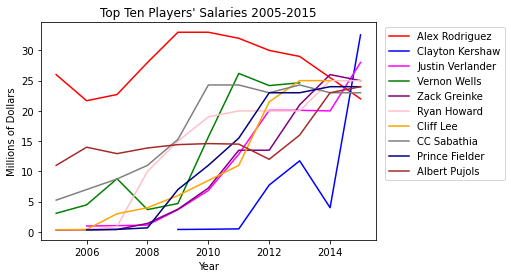

<Figure size 432x288 with 0 Axes>

In [34]:
x_axis = rodrial01.loc[:,"yearID"]
x_axis2 = kershcl01.loc[:,"yearID"]
x_axis3 = verlaju01.loc[:,"yearID"]
x_axis4 = wellsve01.loc[:,"yearID"]
x_axis5 = greinza01.loc[:,"yearID"]
x_axis6 = howarry01.loc[:,"yearID"]
x_axis7 = leecl02.loc[:,"yearID"]
x_axis8 = sabatcc01.loc[:,"yearID"]
x_axis9 = fieldpr01.loc[:,"yearID"]
x_axis10 = pujolal01.loc[:,"yearID"]

rodrial01_sal = rodrial01.loc[:,"Salary in Millions"]
kershcl01_sal = kershcl01.loc[:,"Salary in Millions"]
verlaju01_sal = verlaju01.loc[:,"Salary in Millions"]
wellsve01_sal = wellsve01.loc[:,"Salary in Millions"]
greinza01_sal = greinza01.loc[:,"Salary in Millions"]  
howarry01_sal = howarry01.loc[:,"Salary in Millions"] 
leecl02_sal = leecl02.loc[:,"Salary in Millions"]
sabatcc01_sal = sabatcc01.loc[:,"Salary in Millions"]
fieldpr01_sal = fieldpr01.loc[:,"Salary in Millions"]  
pujolal01_sal = pujolal01.loc[:,"Salary in Millions"]
    
rod, = plt.plot(x_axis, rodrial01_sal, color="red", label="Alex Rodriguez")
ker, = plt.plot(x_axis2, kershcl01_sal, color="blue", label="Clayton Kershaw")
ver, = plt.plot(x_axis3, verlaju01_sal, color="magenta", label="Justin Verlander")
wel, = plt.plot(x_axis4, wellsve01_sal, color="green", label="Vernon Wells")
gre, = plt.plot(x_axis5, greinza01_sal, color="purple", label="Zack Greinke")
how, = plt.plot(x_axis6, howarry01_sal, color="pink", label="Ryan Howard")
lee, = plt.plot(x_axis7, leecl02_sal, color="orange", label="Cliff Lee")
sab, = plt.plot(x_axis8, sabatcc01_sal, color="gray", label="CC Sabathia")
fie, = plt.plot(x_axis9, fieldpr01_sal, color="navy", label="Prince Fielder")
puj, = plt.plot(x_axis10, pujolal01_sal, color="brown", label="Albert Pujols")

plt.title("Top Ten Players' Salaries 2005-2015")
plt.xlabel("Year")
plt.ylabel("Millions of Dollars")
plt.legend(handles=[rod, ker, ver, wel, gre, how, lee, sab, fie, puj], bbox_to_anchor=(1.4, 1.0), loc='upper right') #loc="best")

plt.show()
plt.savefig("Top Players Salaries")

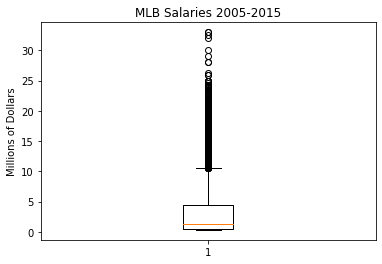

In [37]:
salaries = reduced_df_yrs["Salary in Millions"]
fig1, ax1 = plt.subplots()
ax1.set_title('MLB Salaries 2005-2015')
ax1.set_ylabel('Millions of Dollars')
ax1.boxplot(salaries)
plt.show()

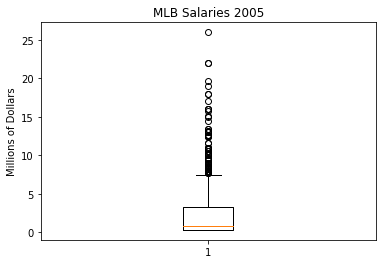

In [45]:
#Individual years graphed: Not sure if needed
salaries_2005_df = reduced_df_yrs.loc[reduced_df["yearID"]==2005]
salaries_2005_df

salaries_2005 = salaries_2005_df["Salary in Millions"]

salaries_2006_df = reduced_df.loc[reduced_df["yearID"]==2006]
salaries_2006 = salaries_2006_df["Salary in Millions"]
salaries_2007_df = reduced_df.loc[reduced_df["yearID"]==2007]
salaries_2007 = salaries_2007_df["Salary in Millions"]
salaries_2008_df = reduced_df.loc[reduced_df["yearID"]==2008]
salaries_2008 = salaries_2008_df["Salary in Millions"]
salaries_2009_df = reduced_df.loc[reduced_df["yearID"]==2009]
salaries_2009 = salaries_2009_df["Salary in Millions"]
salaries_2010_df = reduced_df.loc[reduced_df["yearID"]==2010]
salaries_2010 = salaries_2010_df["Salary in Millions"]
salaries_2011_df = reduced_df.loc[reduced_df["yearID"]==2011]
salaries_2011 = salaries_2011_df["Salary in Millions"]
salaries_2012_df = reduced_df.loc[reduced_df["yearID"]==2012]
salaries_2012 = salaries_2012_df["Salary in Millions"]
salaries_2013_df = reduced_df.loc[reduced_df["yearID"]==2013]
salaries_2013 = salaries_2013_df["Salary in Millions"]
salaries_2014_df = reduced_df.loc[reduced_df["yearID"]==2014]
salaries_2014 = salaries_2014_df["Salary in Millions"]
salaries_2015_df = reduced_df.loc[reduced_df["yearID"]==2015]
salaries_2015 = salaries_2015_df["Salary in Millions"]

fig1, ax1 = plt.subplots()
ax1.set_title('MLB Salaries 2005')
ax1.set_ylabel('Millions of Dollars')
ax1.boxplot(salaries_2005)
plt.show()

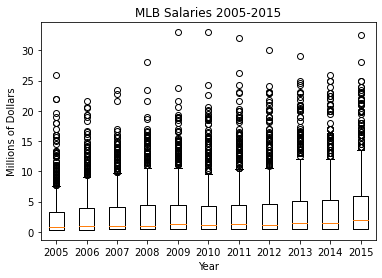

In [48]:
ten_year_salary_plot_data = [salaries_2005, salaries_2006, salaries_2007, salaries_2008, salaries_2009, salaries_2010, salaries_2011,
                            salaries_2012, salaries_2013, salaries_2014, salaries_2015]
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

fig1, ax1 = plt.subplots()
ax1.set_title("MLB Salaries 2005-2015")
ax1.set_xlabel("Year")
ax1.set_ylabel("Millions of Dollars")
ax1.boxplot(ten_year_salary_plot_data, labels = years)
plt.savefig("boxplot")
plt.show()


In [49]:
playoffs_df
playoffs_comparison_df = playoffs_df[["yearID", "round", "teamIDwinner", "teamIDloser"]]
playoffs_comparison_df

world_series_winners = playoffs_comparison_df.loc[playoffs_comparison_df["round"]=="WS"]
world_series_winners

,yearID,round,teamIDwinner,teamIDloser
228,2005,WS,CHA,HOU
235,2006,WS,SLN,DET
242,2007,WS,BOS,COL
249,2008,WS,PHI,TBA
256,2009,WS,NYA,PHI
263,2010,WS,SFN,TEX
270,2011,WS,SLN,TEX
279,2012,WS,SFN,DET
288,2013,WS,BOS,SLN
297,2014,WS,SFN,KCA


In [50]:
playoffs_cs_df = playoffs_df.loc[playoffs_df['round'].isin(['NLCS','ALCS'])]


playoffs_cs_df.head()


,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
222,2005,ALCS,CHA,AL,LAA,AL,4,1,0
225,2005,NLCS,HOU,NL,SLN,NL,4,2,0
229,2006,ALCS,DET,AL,OAK,AL,4,0,0
232,2006,NLCS,SLN,NL,NYN,NL,4,3,0
236,2007,ALCS,BOS,AL,CLE,AL,4,3,0


In [51]:
#amount of times teams made it conference championship series
winner=playoffs_cs_df['teamIDwinner'].value_counts()
print(winner)
loser=playoffs_cs_df['teamIDloser'].value_counts()
type(loser)
data= {"winner":winner,"loser":loser}
playoffs_record= pd.DataFrame(data)

playoffs1_record=playoffs_record.fillna(0)
playoffs1_record

SLN    3
SFN    3
PHI    2
TEX    2
KCA    2
DET    2
BOS    2
HOU    1
TBA    1
COL    1
NYN    1
CHA    1
NYA    1
Name: teamIDwinner, dtype: int64


,winner,loser
ARI,0.0,1.0
BAL,0.0,1.0
BOS,2.0,1.0
CHA,1.0,0.0
CHN,0.0,1.0
CLE,0.0,1.0
COL,1.0,0.0
DET,2.0,2.0
HOU,1.0,0.0
KCA,2.0,0.0


In [52]:
#total amount of appearences to champions series

total_appear=winner.add(loser,fill_value=0)

total_appear.head(15)

ARI    1.0
BAL    1.0
BOS    3.0
CHA    1.0
CHN    1.0
CLE    1.0
COL    1.0
DET    4.0
HOU    1.0
KCA    2.0
LAA    2.0
LAN    3.0
MIL    1.0
NYA    3.0
NYN    2.0
dtype: float64

In [53]:
# Labels for the sections of our pie chart
labels = ["BOS","DET","KCA", "LAA", "TEX","NYA"]

# The values of each section of the pie chart
sizes = [3,4,3,2,2,3]

# The colors of each section of the pie chart
colors = ["blue", "orange", "lightcoral", "red","green","yellow"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1, 0, 0,0,0)

([<matplotlib.patches.Wedge at 0x1f7f87e6e20>,
 [Text(-0.20837777631857382, -1.1817693101178954, 'SLN'),
  Text(1.0832885432166985, -0.19101291091296255, 'SFN'),
  Text(0.707066278611626, 0.8426489646645907, 'PHI'),
  Text(-0.19101313348403376, 1.0832885039714077, 'NYN'),
  Text(-0.9526280242657644, 0.5499998612577156, 'LAN'),
  Text(-1.08328849726493, -0.19101317151832783, 'COL')],
 [Text(-0.12155370285250139, -0.6893654309021057, '33.3%'),
  Text(0.590884659936381, -0.10418886049797955, '16.7%'),
  Text(0.38567251560634136, 0.4596267079988676, '16.7%'),
  Text(-0.10418898190038203, 0.5908846385298587, '11.1%'),
  Text(-0.5196152859631442, 0.29999992432239025, '16.7%'),
  Text(-0.5908846348717799, -0.10418900264636062, '5.6%')])

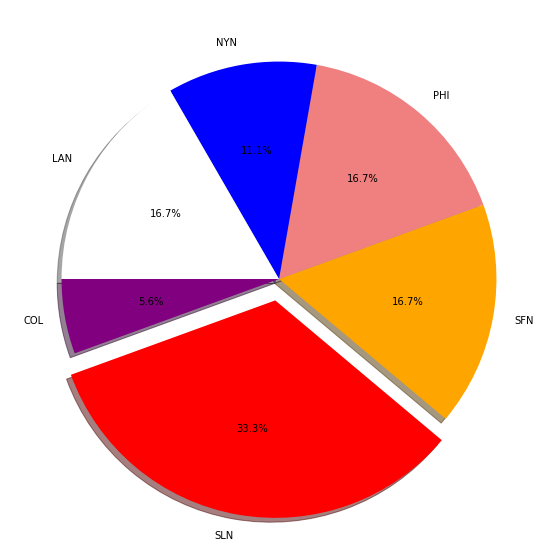

In [57]:
#ALCS appearences
plt.figure(figsize=(10, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

In [55]:
# Labels for the sections of our pie chart
labels = ["SLN","SFN","PHI", "NYN", "LAN","COL"]

# The values of each section of the pie chart
sizes = [6,3,3,2,3,1]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "blue","white","purple"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1,0, 0, 0,0,0)

([<matplotlib.patches.Wedge at 0x1f7f9bee790>,
 [Text(-0.20837777631857382, -1.1817693101178954, 'SLN'),
  Text(1.0832885432166985, -0.19101291091296255, 'SFN'),
  Text(0.707066278611626, 0.8426489646645907, 'PHI'),
  Text(-0.19101313348403376, 1.0832885039714077, 'NYN'),
  Text(-0.9526280242657644, 0.5499998612577156, 'LAN'),
  Text(-1.08328849726493, -0.19101317151832783, 'COL')],
 [Text(-0.12155370285250139, -0.6893654309021057, '33.3%'),
  Text(0.590884659936381, -0.10418886049797955, '16.7%'),
  Text(0.38567251560634136, 0.4596267079988676, '16.7%'),
  Text(-0.10418898190038203, 0.5908846385298587, '11.1%'),
  Text(-0.5196152859631442, 0.29999992432239025, '16.7%'),
  Text(-0.5908846348717799, -0.10418900264636062, '5.6%')])

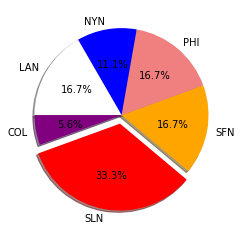

In [58]:
#NLCS appearences
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

In [59]:
#formula for payroll broken up by year
#salaries_df = salaries_df.groupby(['
#salaries_df.head()

In [60]:
#team payroll per yr 
tmsalaries_df = salaries_df.groupby('teamID', as_index=False).sum()

tmsalaries_df.head(22)

,teamID,yearID,salary
0,ARI,603015,751389648
1,ATL,598947,974514935
2,BAL,609019,921097338
3,BOS,647269,1610416951
4,CHA,580885,1148366309
5,CHN,590931,1176105495
6,CIN,611014,896609817
7,CLE,615069,753754796
8,COL,611014,802915313
9,DET,598927,1331270485
